In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [2]:
# Load the fashion Minist Dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


# Explore the Data 

In [7]:
len(train_images)

60000

In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(train_labels.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(60000,)


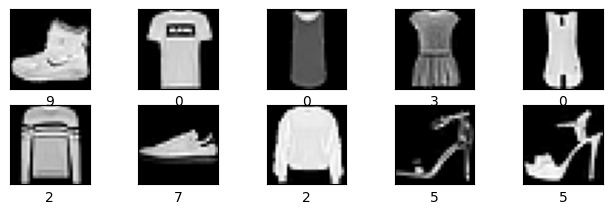

In [5]:
# plotting the data of train_images and Train_labels in range quantity using for loop
plt.figure(figsize=(8,6))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
    plt.xticks([])
    plt.yticks([])

In [6]:
# Display the Pixel numbers of Image
for row in train_images[5]:
    for i in row:
        print(f'{i:3}', end='')
    print()

  0  0  0  0  1  0  0  0  0 22 88188172132125141199143  9  0  0  0  1  0  0  0  0  0
  0  0  0  1  0  0 20131199206196202242255255250222197206188126 17  0  0  0  0  0  0
  0  0  0  1  0 35214191183178175168150162159152158179183189195185 82  0  0  0  0  0
  0  0  0  0  0170190172177176171169162155148154169174175175177183188 12  0  0  0  0
  0  0  0  0 25194180178174184187189187184181189200197193190178175194 90  0  0  0  0
  0  0  0  0 42218191197208204211209210212211214215213214211211191200158  0  0  0  0
  0  0  0  0 88221215217219211185150118107 99 88 83 90135212203207219169  0  0  0  0
  0  0  0  0  0 27118162 40  0  0  0 10 19 28 39 47 36  0  0203230220203  0  0  0  0
  0  0  0  0138136 71 69 54216217203184168163162163178221186 38 26  7  0  0  0  0  0
  0  0  0  0 67134154224129 66 81117129128132137131129 86 73157151134216 18  0  0  0
  0  0  0  0203198172183206255255250243240239235238244255238184160 86 98  0  0  0  0
  0  0  0  0122188224151105127 97100105114117117113103 9811114225

In [7]:
# normalize the data into standard form 
train_images = train_images.astype("float32")/255.0
test_images = test_images.astype("float32")/255.0


In [8]:
# Display the Pixel numbers of Image
for row in train_images[0]:
    for i in row:
        print(f'{i:0.3f}', end='')
    print()


0.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.000
0.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.000
0.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.000
0.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0040.0000.0000.0510.2860.0000.0000.0040.0160.0000.0000.0000.0000.0040.0040.000
0.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0120.0000.1410.5330.4980.2430.2120.0000.0000.0000.0040.0120.0160.0000.0000.012
0.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0240.0000.4000.8000.6900.5250.5650.4820.0900.0000.0000.0000.0000.0470.0390.000
0.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.0000.6080.9250.8120.6980.4200.6120.6310.4270.2510.0900.3020.5100.2820.059
0.0000.0000.0

In [9]:
# Reshaping the data dimensions
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Building the Convolutional NeuraL Network 

In [10]:
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))

CNN = Sequential([
    input_layer,
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
CNN.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,194 (24.20 KB)

 Trainable params: 6,194 (24.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.6055 - loss: 1.0718 - val_accuracy: 0.7709 - val_loss: 0.6309
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7821 - loss: 0.5871 - val_accuracy: 0.7964 - val_loss: 0.5627
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8117 - loss: 0.5182 - val_accuracy: 0.8120 - val_loss: 0.5183
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8310 - loss: 0.4697 - val_accuracy: 0.8308 - val_loss: 0.4803
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8433 - loss: 0.4334 - val_accuracy: 0.8355 - val_loss: 0.4631
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8482 - loss: 0.4201 - val_accuracy: 0.8334 - val_loss: 0.4617
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8539 - loss: 0.4069 - val_accuracy: 0.8366 - val_loss: 0.4477
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8596 -

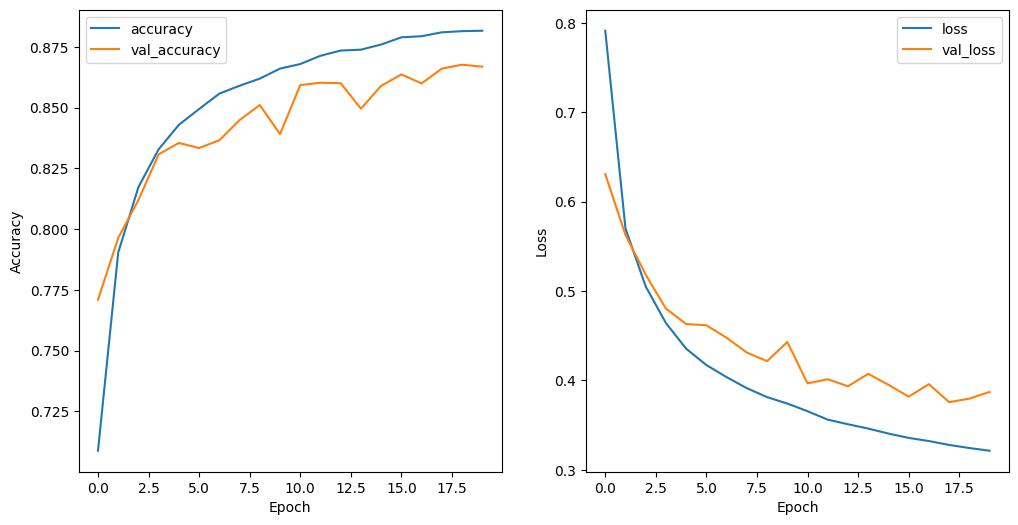

In [11]:
%%time
CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = CNN.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

# Plotting the accuracy and loss of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



In [15]:
# Evaluate the model
test_loss, test_accuracy = CNN.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8699 - loss: 0.3840
Test Accuracy: 0.8669000267982483
Test Loss: 0.3870755434036255


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
(10000, 10)
[2.6472355e-10 9.3851884e-07 8.2275430e-11 3.7097479e-06 3.8355819e-11
 2.6839126e-02 9.8772390e-10 1.0512173e-01 7.6612611e-07 8.6803377e-01]
9
9


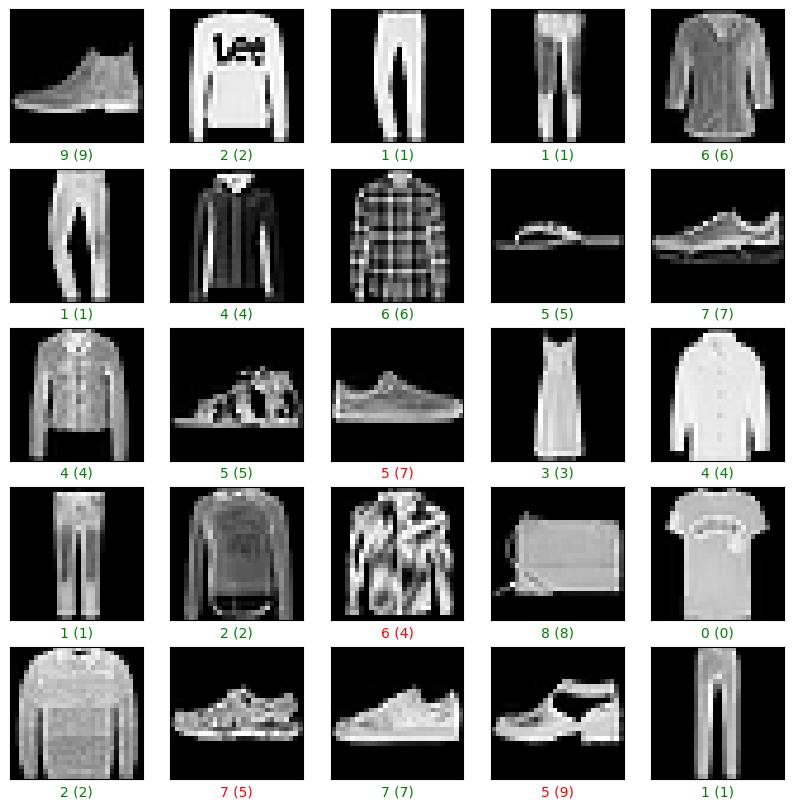

In [13]:
# Predict the model
predictions = CNN.predict(test_images)
print(predictions.shape)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

# Plotting the predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)

In [14]:
# Save the model
CNN.save('Saved_models/Fashion_minist_model.h5')